# > Hipotesis de investigacion

 **19. Selección de Características:** En problemas de clasificación con datos altamente dimensionales (al menos varias decenas de atributos), el método RELIEF es más efectivo y eficiente que el método denominado MRMR (Minimum-Redundancy-Maximum-Relevance)

Integrantes: \
                 -Hugo Rocha -- 201610531-K \
                 -Gabriel Vergara -- 201510519-7

Equipo: RNG

[Video de la defensa](https://youtu.be/Lo9bp2NuXZQ)

El presente es un trabajo original, desarrollado por los autores en conformidad con todas reglas de codigo de honor y honestidad. Sumado a esto ultimo 
se deja en claro que la contribucion de ambos participantes en el presente trabajo fue la siguiente:

Gabriel Vergara:\
-Recoleccion de data sets. \
-Testeo inicial 20 n_features. 
                 
Hugo Rocha:      
-Aplicacion de metodos ReliefF Y MRMR. \
-Cross Validation distintas N_features. 

Ambos trabajamos de manera colaborativa en la formulacion de las conclusiones obtenidas en el presente trabajo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_t,multivariate_normal,t,uniform,skewnorm,norm,chi2,expon,erlang

import warnings
warnings.filterwarnings("ignore")

In [2]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

## -Metodologia

 A continuacion pondremos a prueba esta hipotesis haciendo uso de 3 data sets de clasificacion con 57 , 170 y 49 columnas respectivamente. Para cada uno de ellos se hara uso de los metodos ReliefF y MRMR comparandolos simultaniamente para varios valores de N_features mediante la metrica precision_score y haciendo uso de un modelo a eleccion.

# * Data set Spam

In [3]:
data= pd.read_csv("spam.csv")

In [4]:
data

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,nonspam
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,nonspam
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,nonspam
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,nonspam


In [5]:
y = pd.get_dummies(data["type"])['spam']
X = data.drop(["type"], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=44, stratify = y)

## -Testeo sin reduccion con 3 clasificadores

### -QDA

In [6]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True) #Guardamos la matriz de covarianzas para hace mas adelante el metodo mixto 
qda.fit(X_train, y_train.ravel()) #Entrenamos

QuadraticDiscriminantAnalysis(store_covariance=True)

In [7]:
y_pred_qda = qda.predict(X_val)

In [8]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_qda)

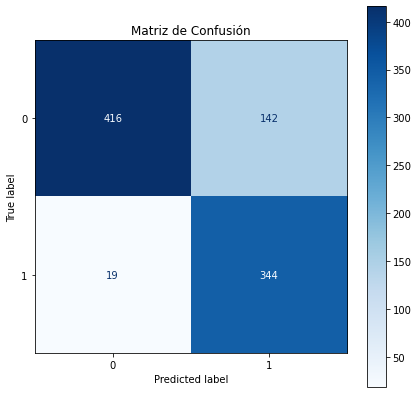

In [9]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [10]:
accuracy_score(y_val,y_pred_qda)

0.8251900108577633

In [11]:
#precision_score
precision_score(y_val,y_pred_qda,average='macro')

0.832070384560806

### LDA

In [12]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train.ravel())

LinearDiscriminantAnalysis(store_covariance=True)

In [13]:
y_pred_lda=lda.predict(X_val)

In [14]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_lda)

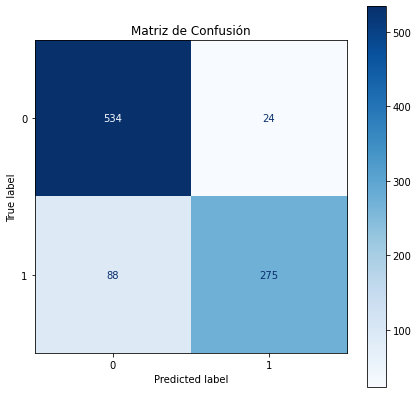

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [16]:
accuracy_score(y_val,y_pred_lda)

0.8783930510314875

In [17]:
#precision_score
precision_score(y_val,y_pred_lda,average='macro')

0.8891266708965577

### Clasificador Logistico

In [18]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred=logistic_reg.predict(X_val)

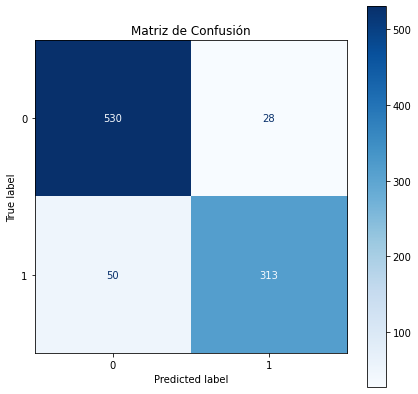

In [20]:
cm=confusion_matrix(y_val,y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [21]:
accuracy_score(y_val,y_pred)

0.9153094462540716

In [22]:
precision_score(y_val,y_pred,average='macro')

0.9158408332490646

## MRMR

 Como prueba inicial procedemos por MRMR a elejir las 20 columnas mas importantes para el Data frame de spam

In [2]:
from mrmr import mrmr_classif

In [24]:
selected_features = mrmr_classif(X, y, K = 20)

100%|██████████| 20/20 [00:00<00:00, 39.35it/s]


In [25]:
selected_features

['your',
 'capitalTotal',
 'remove',
 'num000',
 'free',
 'charExclamation',
 'our',
 'charDollar',
 'hp',
 'internet',
 'money',
 'over',
 'business',
 'you',
 'email',
 'credit',
 'order',
 'hpl',
 'george',
 'receive']

In [26]:
X_train_mr=X_train.drop(list(set(list(X_train.columns))-set(selected_features)),axis=1)
X_val_mr=X_val.drop(list(set(list(X_train.columns))-set(selected_features)),axis=1)

### Clasificador logistico

In [27]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_mr,y_train)

LogisticRegression()

In [28]:
y_pred=logistic_reg.predict(X_val_mr)

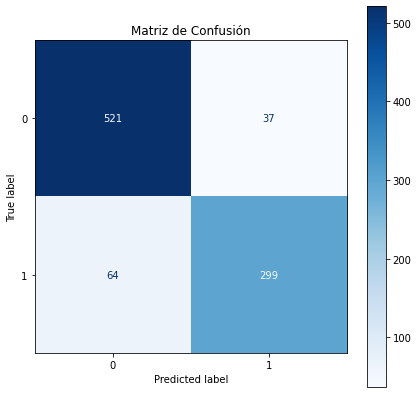

In [29]:
cm=confusion_matrix(y_val,y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [30]:
accuracy_score(y_val,y_pred)

0.8903365906623235

In [31]:
precision_score(y_val,y_pred,average='macro')

0.8902396214896214

## ReliefF

In [3]:
from ReliefF import ReliefF

In [33]:
fs = ReliefF(n_neighbors=3, n_features_to_keep=20)

In [34]:
X_rf=fs.fit_transform(np.array(X), np.array(y))

In [35]:
X_train_rf, X_val_rf, y_train, y_val = train_test_split(X_rf,y,test_size=0.2, random_state=44, stratify = y)

### Clasificador logistico

In [36]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_rf,y_train)

LogisticRegression()

In [37]:
y_pred=logistic_reg.predict(X_val_rf)

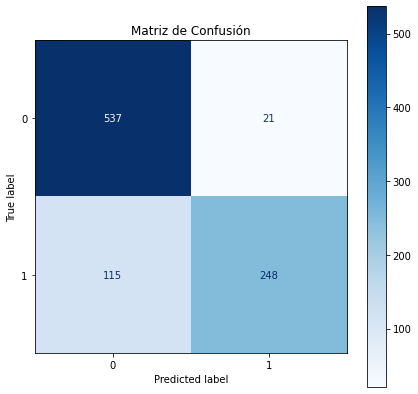

In [38]:
cm=confusion_matrix(y_val,y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [39]:
accuracy_score(y_val,y_pred)

0.8523344191096635

In [40]:
precision_score(y_val,y_pred,average='macro')

0.8727763587018496

Como primera conclucion podemos ver que contrario a lo que afirma la hipotesis MRMR esta entregando mejores resultados que Relief para un de reduccion de 57 a 20 columnas.

## Prueba para varias semillas y cantidades de columnas

A continuacion validaremos nuestra hipotesis de manera mas robusta repitiendo para cada valor de N_features el experiemento una cantidad considerable de veces.

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import cross_validate

In [43]:
lista_scores_mr=[]
lista_scores_rf=[]
for i in range(1,57):
    selected_features = mrmr_classif(X, y, K = i)
    X_mr=X.drop(list(set(list(X.columns))-set(selected_features)),axis=1)
    scores_mr = cross_validate(LogisticRegression(), X_mr, y,scoring='precision_macro', cv=32)
    lista_scores_mr.append((float(scores_mr['test_score'].mean()),float(scores_mr['test_score'].std())))
    fs = ReliefF(n_neighbors=3, n_features_to_keep=i)
    X_rf=fs.fit_transform(np.array(X), np.array(y))
    scores_rf = cross_validate(LogisticRegression(), X_rf, y,scoring='precision_macro', cv=32)
    lista_scores_rf.append((float(scores_rf['test_score'].mean()),float(scores_rf['test_score'].std() ) ))

100%|██████████| 56/56 [00:05<00:00, 10.20it/s]


In [44]:
Rendimiento_mr=pd.DataFrame(lista_scores_mr)
Rendimiento_rf=pd.DataFrame(lista_scores_rf)

In [45]:
Rendimiento_mr.columns=['Promedio','Desviacion']
Rendimiento_rf.columns=['Promedio','Desviacion']

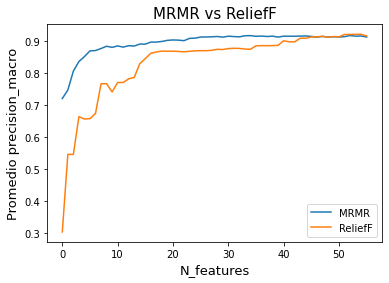

In [46]:
plt.plot( Rendimiento_mr.index  ,Rendimiento_mr['Promedio'],label="MRMR")
plt.plot( Rendimiento_rf.index ,Rendimiento_rf['Promedio'],label="ReliefF")

plt.title("MRMR vs ReliefF",fontsize=15)
plt.xlabel("N_features",fontsize=13)
plt.ylabel("Promedio precision_macro",fontsize=13)
plt.legend()
plt.show()

Este ultimo grafico nos muestra que  el rendimiento de MRMR supera al de ReliefF a lo largo de practicamente todas la posibles N_features.

# * MUSK cell's

In [9]:
df= pd.read_csv("musk_csv.csv")

In [10]:
df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [11]:
y = df["class"]
X = df.drop(["class",'conformation_name','ID','molecule_name'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=44, stratify = y)

## -Testeo sin reduccion con 3 clasificadores

### QDA

In [50]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True) #Guardamos la matriz de covarianzas para hace mas adelante el metodo mixto 
qda.fit(X_train, y_train.ravel()) #Entrenamos

QuadraticDiscriminantAnalysis(store_covariance=True)

In [51]:
y_pred_qda = qda.predict(X_val)

In [52]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_qda)

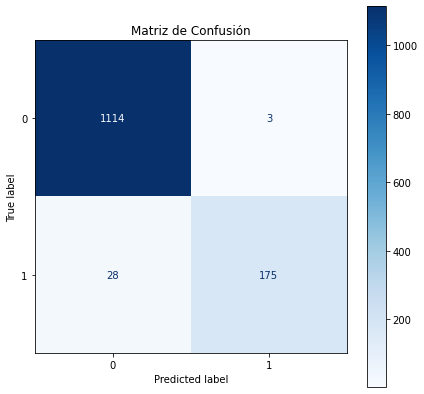

In [53]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [54]:
accuracy_score(y_val,y_pred_qda)

0.9765151515151516

In [55]:
precision_score(y_val,y_pred_qda,average='macro')

0.9793138393120683

### LDA

In [56]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train.ravel())

LinearDiscriminantAnalysis(store_covariance=True)

In [57]:
y_pred_lda=lda.predict(X_val)

In [58]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_lda)

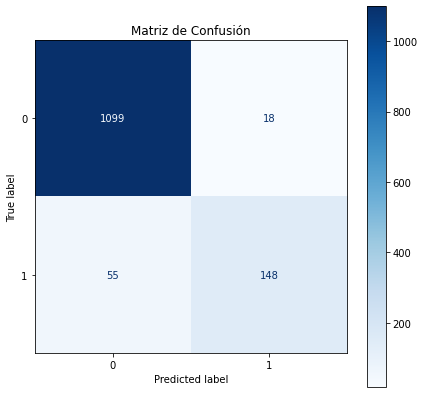

In [59]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [60]:
accuracy_score(y_val,y_pred_lda)

0.9446969696969697

In [61]:
precision_score(y_val,y_pred_lda,average='macro')

0.9219529765509177

### Clasificador logistico

In [62]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred=logistic_reg.predict(X_val)

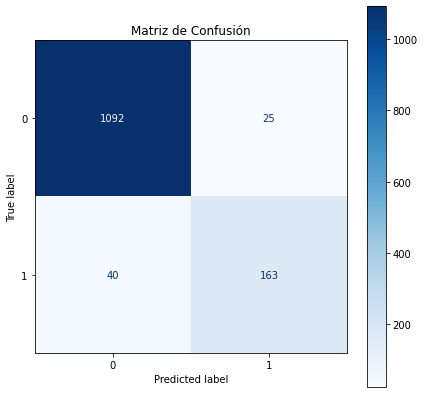

In [64]:
cm=confusion_matrix(y_val,y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [65]:
accuracy_score(y_val,y_pred)

0.9507575757575758

In [66]:
precision_score(y_val,y_pred,average='macro')

0.9158427937749041

Como QDA es el modelo que mostro mejor rendimiento, es el que usaremos para validar nuestra hipotesis.

## -MRMR

In [67]:
selected_features = mrmr_classif(X, y, K = 20)

100%|██████████| 20/20 [00:02<00:00,  7.04it/s]


In [68]:
selected_features

['f132',
 'f92',
 'f68',
 'f36',
 'f126',
 'f49',
 'f163',
 'f124',
 'f58',
 'f59',
 'f135',
 'f91',
 'f109',
 'f96',
 'f14',
 'f37',
 'f125',
 'f74',
 'f70',
 'f111']

In [69]:
X_train_mr=X_train.drop(list(set(list(X_train.columns))-set(selected_features)),axis=1)
X_val_mr=X_val.drop(list(set(list(X_train.columns))-set(selected_features)),axis=1)

### QDA

In [70]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True) #Guardamos la matriz de covarianzas para hace mas adelante el metodo mixto 
qda.fit(X_train_mr, y_train.ravel()) #Entrenamos

QuadraticDiscriminantAnalysis(store_covariance=True)

In [71]:
y_pred_qda = qda.predict(X_val_mr)

In [72]:
cm = confusion_matrix(y_val,y_pred_qda)

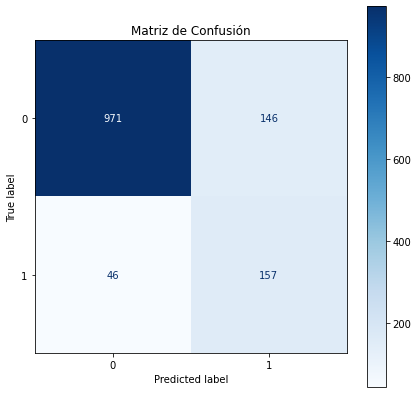

In [73]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [74]:
accuracy_score(y_val,y_pred_qda)

0.8545454545454545

In [75]:
#precision_score
precision_score(y_val,y_pred_qda,average='macro')

0.7364603717008869

## -ReliefF

In [76]:
fs = ReliefF(n_neighbors=3, n_features_to_keep=20)

In [77]:
X_rf=fs.fit_transform(np.array(X), np.array(y))

In [78]:
X_train_rf, X_val_rf, y_train, y_val = train_test_split(X_rf,y,test_size=0.2, random_state=44, stratify = y)

### QDA

In [79]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True) #Guardamos la matriz de covarianzas para hace mas adelante el metodo mixto 
qda.fit(X_train_rf, y_train.ravel()) #Entrenamos

QuadraticDiscriminantAnalysis(store_covariance=True)

In [80]:
y_pred_qda = qda.predict(X_val_rf)

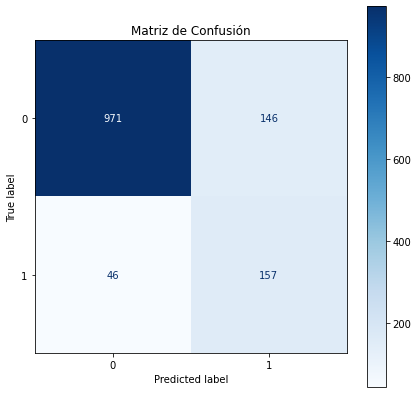

In [81]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [82]:
accuracy_score(y_val,y_pred_qda)

0.696969696969697

In [83]:
#precision_score
precision_score(y_val,y_pred_qda,average='macro')

0.6446430634373136

##  -Prueba para varias semillas y cantidades de columnas

In [12]:
lista_scores_mr=[]
lista_scores_rf=[]
for i in range(1,110): #Por un tema de costo computacional solo se trabajara con N_features entre 1 y 110
    selected_features = mrmr_classif(X, y, K = i)
    X_mr=X.drop(list(set(list(X.columns))-set(selected_features)),axis=1)
    scores_mr = cross_validate(QuadraticDiscriminantAnalysis(), X_mr, y,scoring='precision_macro', cv=32)
    lista_scores_mr.append((float(scores_mr['test_score'].mean()),float(scores_mr['test_score'].std())))
    fs = ReliefF(n_neighbors=3, n_features_to_keep=i)
    X_rf=fs.fit_transform(np.array(X), np.array(y))
    scores_rf = cross_validate(QuadraticDiscriminantAnalysis(), X_rf, y,scoring='precision_macro', cv=32)
    lista_scores_rf.append((float(scores_rf['test_score'].mean()),float(scores_rf['test_score'].std() ) ))

100%|██████████| 109/109 [00:06<00:00, 16.08it/s]


In [13]:
Rendimiento_mr=pd.DataFrame(lista_scores_mr)
Rendimiento_rf=pd.DataFrame(lista_scores_rf)

In [14]:
Rendimiento_mr.columns=['Promedio','Desviacion']
Rendimiento_rf.columns=['Promedio','Desviacion']

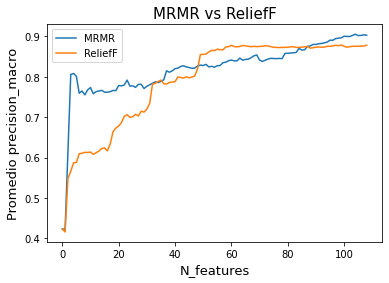

In [15]:
plt.plot( Rendimiento_mr.index  ,Rendimiento_mr['Promedio'],label="MRMR")
plt.plot( Rendimiento_rf.index ,Rendimiento_rf['Promedio'],label="ReliefF")

plt.title("MRMR vs ReliefF",fontsize=15)
plt.xlabel("N_features",fontsize=13)
plt.ylabel("Promedio precision_macro",fontsize=13)
plt.legend()
plt.show()

En este otro grafico podemos ver que hay un comortamiento algo mas competitivo entre ambos metodos, sin embargo no es posible almenos afirmar que ReliefF funcione claramente mejor que MRMR.

# *Data sintetica

## -Genracion de data sintetica

In [16]:
n = 10000
r1 = pd.DataFrame(uniform.rvs(size=n,random_state=1))
r2 = pd.DataFrame(t.rvs(df = 7, loc=0, scale=1, size=n, random_state=2))
r3 = pd.DataFrame(t.rvs(df = 4, loc=0, scale=3, size=n, random_state=3))
r4 = pd.DataFrame(uniform.rvs(size=n,random_state=4))
r5 = pd.DataFrame(uniform.rvs(size=n,random_state=5))
r6 = pd.DataFrame(t.rvs(df = 9, loc=0, scale=17, size=n, random_state=6))
r7 = pd.DataFrame(t.rvs(df = 15, loc=0, scale=9, size=n, random_state=22))
r8 = pd.DataFrame(skewnorm.rvs(3, size=n, random_state=21 ))
r9 = pd.DataFrame(skewnorm.rvs(-5, size=n, random_state=43 ))
r10 = pd.DataFrame(norm.rvs(scale=8, size=n,random_state=100))
r11 = pd.DataFrame(norm.rvs(scale=3, size=n,random_state=12))
r12 = pd.DataFrame(norm.rvs(scale=15, size=n,random_state=1012))
r13 = pd.DataFrame(norm.rvs(scale=80, size=n,random_state=109))
r14 = pd.DataFrame(t.rvs(df = 4, loc=0, scale=30, size=n, random_state=300))
r15 = pd.DataFrame(t.rvs(df = 9, loc=0, scale=19, size=n, random_state=763))
r16 = pd.DataFrame(chi2.rvs(df = 4, loc=-6, scale=143, size=n, random_state=543))
r16 = pd.DataFrame(chi2.rvs(df = 43, loc=6, scale=13, size=n, random_state=542))
r17 = pd.DataFrame(expon.rvs(loc=0, scale=123, size=n, random_state=321))
r18 = pd.DataFrame(erlang.rvs(13, loc=21, scale=100, size=n, random_state=3233))
r19 = pd.DataFrame(erlang.rvs(3, loc=-32, scale=19, size=n, random_state=233))
r20 = pd.DataFrame(uniform.rvs(scale = 322, loc = 13, size=n,random_state=511))

ruidos = ['r1','r2','r3','r4','r5','r6','r7','r8','r9','r10','r11',
          'r12','r13','r14','r15','r16','r17','r18','r19','r20']


In [17]:
Ruido = pd.concat([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,
                   r11,r12,r13,r14,r15,r16,r17,r18,r19,r20], axis = 1)

In [18]:
Ruido.columns = ruidos

In [19]:
# generamos una matriz de covarianza 
# data balanceada, 2 clases de n/2 cada una
N = 5000
#frequency_domain_features_test.csv
#heart_rate_non_linear_features_test.csv
#time_domain_features_test.csv
tdf = pd.read_csv("time_domain_features_test.csv")
fdf = pd.read_csv("frequency_domain_features_test.csv")
S1 = tdf.cov()
M1 = tdf.mean()
S2 = fdf.cov()
M2 = fdf.mean()

In [20]:
# para clase 1
nombre1_1 = ['x0','x1','x2','x3','x4','x5','x6','x7',
          'x8','x9','x10','x11','x12','x13','x14',
          'x15','x16','x17']
nombre1_2 = ['x18','x19','x20','x21','x22','x23','x24','x25',
          'x26','x27','x28']

nombre2_1 = ['x0','x1','x2','x3','x4','x5','x6','x7',
          'x8','x9','x10']
nombre2_2 = ['x11','x12','x13','x14','x15','x16','x17','x18',
          'x19','x20','x21','x22','x23','x24','x25',
          'x26','x27','x28']
clase_1_1 = multivariate_normal.rvs(mean=M1*1.1, cov=S1, size=N, random_state=12)
clase_1_2 = multivariate_t.rvs(loc=M2*0.6, shape=S2, df=9, size=N, random_state=152)

clase_2_1 = multivariate_normal.rvs(mean=M1*1, cov=S1*1, size=N, random_state=44)
clase_2_2 = multivariate_t.rvs(loc=M2*0.6, shape=S2, df=4, size=N, random_state=70)

In [21]:
df1_1 = pd.DataFrame(clase_1_1,columns=nombre1_1)
df1_2 = pd.DataFrame(clase_1_2,columns=nombre1_2)
df_1 = pd.concat([df1_1,df1_2], axis=1)

df2_1 = pd.DataFrame(clase_2_1,columns=nombre1_1)
df2_2 = pd.DataFrame(clase_2_2,columns=nombre1_2)
df_2 = pd.concat([df2_1,df2_2], axis=1)

In [22]:
df_1['Clase'] = 1
df_2['Clase'] = 0

In [23]:
DF = pd.concat([df_1,df_2], axis = 0)

In [24]:
#pd.concat([DF,Ruido], axis = 1)
DF.index = Ruido.index

In [25]:
Simulados = pd.concat([DF,Ruido], axis = 1)

In [26]:
Simulados.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'Clase', 'r1',
       'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12',
       'r13', 'r14', 'r15', 'r16', 'r17', 'r18', 'r19', 'r20'],
      dtype='object')

In [27]:
y = Simulados['Clase']
X = Simulados.drop(['Clase'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=44, stratify = y)

## -Testeo sin reduccion con 3 clasificadores

### QDA

In [28]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True) #Guardamos la matriz de covarianzas para hace mas adelante el metodo mixto 
qda.fit(X_train, y_train.ravel()) #Entrenamos

QuadraticDiscriminantAnalysis(store_covariance=True)

In [29]:
y_pred_qda = qda.predict(X_val)

In [30]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_qda)

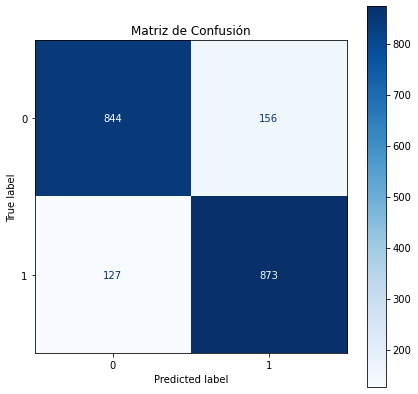

In [31]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [32]:
accuracy_score(y_val,y_pred_qda)

0.8585

In [33]:
precision_score(y_val,y_pred_qda,average='macro')

0.8588017522736622

### LDA

In [34]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train.ravel())

LinearDiscriminantAnalysis(store_covariance=True)

In [35]:
y_pred_lda=lda.predict(X_val)

In [36]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_lda)

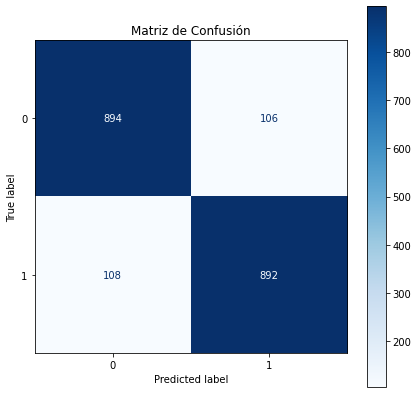

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [38]:
accuracy_score(y_val,y_pred_lda)

0.893

In [39]:
precision_score(y_val,y_pred_lda,average='macro')

0.893001572006288

### Clasificador logistico

In [40]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred=logistic_reg.predict(X_val)

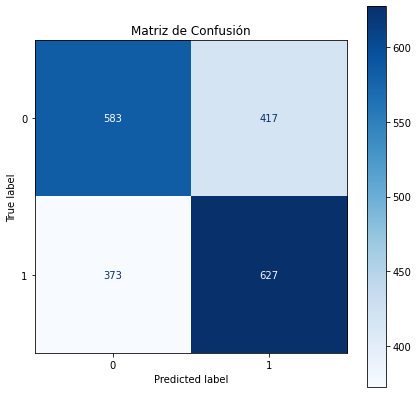

In [42]:
cm=confusion_matrix(y_val,y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [43]:
accuracy_score(y_val,y_pred)

0.605

In [44]:
precision_score(y_val,y_pred,average='macro')

0.6052036743134709

Como LDA es el que dio mejores resultado , haremos uso de este modelo para validar nuestra hipotesis.

## -MRMR

In [45]:
selected_features = mrmr_classif(X, y, K = 20)

100%|██████████| 20/20 [00:00<00:00, 38.20it/s]


In [46]:
selected_features

['x0',
 'r6',
 'x12',
 'x1',
 'x15',
 'x24',
 'x3',
 'r19',
 'x4',
 'x5',
 'x13',
 'r18',
 'r20',
 'x14',
 'x2',
 'r13',
 'r12',
 'r15',
 'r1',
 'r16']

In [47]:
X_train_mr=X_train.drop(list(set(list(X_train.columns))-set(selected_features)),axis=1)
X_val_mr=X_val.drop(list(set(list(X_train.columns))-set(selected_features)),axis=1)

### LDA

In [48]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train_mr, y_train.ravel())

LinearDiscriminantAnalysis(store_covariance=True)

In [49]:
y_pred_lda=lda.predict(X_val_mr)

In [50]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_lda)

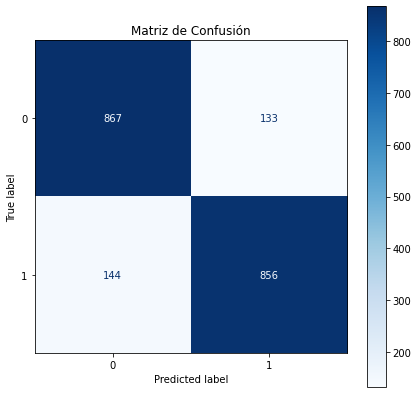

In [51]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [52]:
accuracy_score(y_val,y_pred_lda)

0.8615

In [53]:
precision_score(y_val,y_pred_lda,average='macro')

0.861543746793362

## -ReliefF

In [54]:
from ReliefF import ReliefF

In [55]:
fs = ReliefF(n_neighbors=3, n_features_to_keep=20)

In [56]:
X_rf=fs.fit_transform(np.array(X), np.array(y))

In [57]:
X_train_rf, X_val_rf, y_train, y_val = train_test_split(X_rf,y,test_size=0.2, random_state=44, stratify = y)

### LDA

In [58]:
lda = LinearDiscriminantAnalysis(store_covariance=True)   
lda.fit(X_train_rf, y_train.ravel())

LinearDiscriminantAnalysis(store_covariance=True)

In [59]:
y_pred_lda=lda.predict(X_val_rf)

In [60]:
# Matriz de confusion
cm = confusion_matrix(y_val,y_pred_lda)

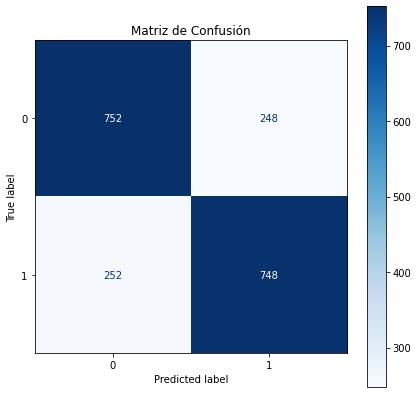

In [61]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues,ax=ax)
ax.set_title('Matriz de Confusión')
ax.grid(False) 
plt.show()

In [62]:
accuracy_score(y_val,y_pred_lda)

0.75

In [63]:
precision_score(y_val,y_pred_lda,average='macro')

0.750004000064001

##  -Prueba para varias semillas y cantidades de columnas

In [64]:
lista_scores_mr=[]
lista_scores_rf=[]
for i in range(1,49): #Por un tema de costo computacional solo se trabajara con N_features entre 1 y 110
    selected_features = mrmr_classif(X, y, K = i)
    X_mr=X.drop(list(set(list(X.columns))-set(selected_features)),axis=1)
    scores_mr = cross_validate(LinearDiscriminantAnalysis(), X_mr, y,scoring='precision_macro', cv=32)
    lista_scores_mr.append((float(scores_mr['test_score'].mean()),float(scores_mr['test_score'].std())))
    fs = ReliefF(n_neighbors=3, n_features_to_keep=i)
    X_rf=fs.fit_transform(np.array(X), np.array(y))
    scores_rf = cross_validate( LinearDiscriminantAnalysis(), X_rf, y,scoring='precision_macro', cv=32)
    lista_scores_rf.append((float(scores_rf['test_score'].mean()),float(scores_rf['test_score'].std() ) ))

100%|██████████| 48/48 [00:05<00:00,  8.70it/s]


In [65]:
Rendimiento_mr=pd.DataFrame(lista_scores_mr)
Rendimiento_rf=pd.DataFrame(lista_scores_rf)

In [66]:
Rendimiento_mr.columns=['Promedio','Desviacion']
Rendimiento_rf.columns=['Promedio','Desviacion']

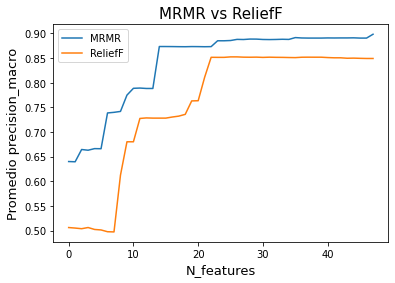

In [67]:
plt.plot( Rendimiento_mr.index  ,Rendimiento_mr['Promedio'],label="MRMR")
plt.plot( Rendimiento_rf.index ,Rendimiento_rf['Promedio'],label="ReliefF")

plt.title("MRMR vs ReliefF",fontsize=15)
plt.xlabel("N_features",fontsize=13)
plt.ylabel("Promedio precision_macro",fontsize=13)
plt.legend()
plt.show()

En este grafico claramente se ve que MRMR es mejor que ReliefF para todo N_features.

# Conclusion 

En base a la evidencia obtenida de los tres data set utilizados para validar nuestra hipotesis concluimos que ReliefF no es, claramente mejor que MRMR para los conjuntos de datos con "gran cantidad" de columnas al no mostrar en ninguno de los graficos evidencia de lo contrario.